In [53]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime 
from collections import defaultdict
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN

In [54]:
#create a pandas dataframes from csv files
users = pd.read_csv('new_users.csv', lineterminator='\n', index_col=0)
#tweets = pd.read_csv('new_tweets.csv', lineterminator='\n', index_col=0)
users.head(2)

,user_id,name,lang,bot,statuses_count,count,retweet_received,reply_received,favorite_received,hashtag_used,...,urls_avg,mentions_avg,hashtags_avg,avg_lenght,tweets_per_year,activity_period,Bot_Entropy,sub_year,sub_month,sub_day
0,2353593986,Lamonica Raborn,en,1,132,132,5,0,5,13,...,0.0,0.28,0.10,62,22.000000,5,0.001426,2019,2,22
1,2358850842,Lourie Botton,en,0,122,122,3,0,6,4,...,0.0,0.34,0.03,69,20.333333,5,NaN,2019,2,26


In [65]:
users_clean = users.drop(columns= [ 'user_id', 'Bot_Entropy'] , axis=1)
users_clean.replace(['en', 'it', 'es', 'pt', 'en-gb', 'ru', 'fr', 'ja', 'zh-tw', 'tr', 'id', 'ko', 'de', 'nl', 'en-gb', 'ar', 'da', 'en-au', 'zh-cn', 'pl', 'el', 'fil', 'sv'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], inplace=True)
#users_clean = users.drop(columns= [ 'lang', 'name','user_id', 'bot', 'Bot_Entropy'] , axis=1)
users_clean.head(5)

,name,lang,bot,statuses_count,count,retweet_received,reply_received,favorite_received,hashtag_used,urls_used,...,reply_avg,urls_avg,mentions_avg,hashtags_avg,avg_lenght,tweets_per_year,activity_period,sub_year,sub_month,sub_day
0,Lamonica Raborn,0,1,132,132,5,0,5,13,0,...,0.0,0.00,0.28,0.10,62,22.000000,5,2019,2,22
1,Lourie Botton,0,0,122,122,3,0,6,4,0,...,0.0,0.00,0.34,0.03,69,20.333333,5,2019,2,26
2,Dadan Syarifudin,0,1,4,4,0,0,0,0,0,...,0.0,0.00,0.00,0.00,19,4.000000,0,2015,4,30
3,Carletto Focia,1,1,1439,1439,1190,0,259,107,36,...,0.0,0.03,0.01,0.07,87,179.875000,30,2017,1,18
4,MBK Ebook,0,0,7085,3656,62,0,226,479,3,...,0.0,0.00,0.53,0.13,72,731.200000,4,2019,6,18


## Correlation Analysis

/var/folders/h4/5wp1mt_n1k72n6zcf7wxd6bc0000gn/T/ipykernel_85308/308467660.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a = users.corr()


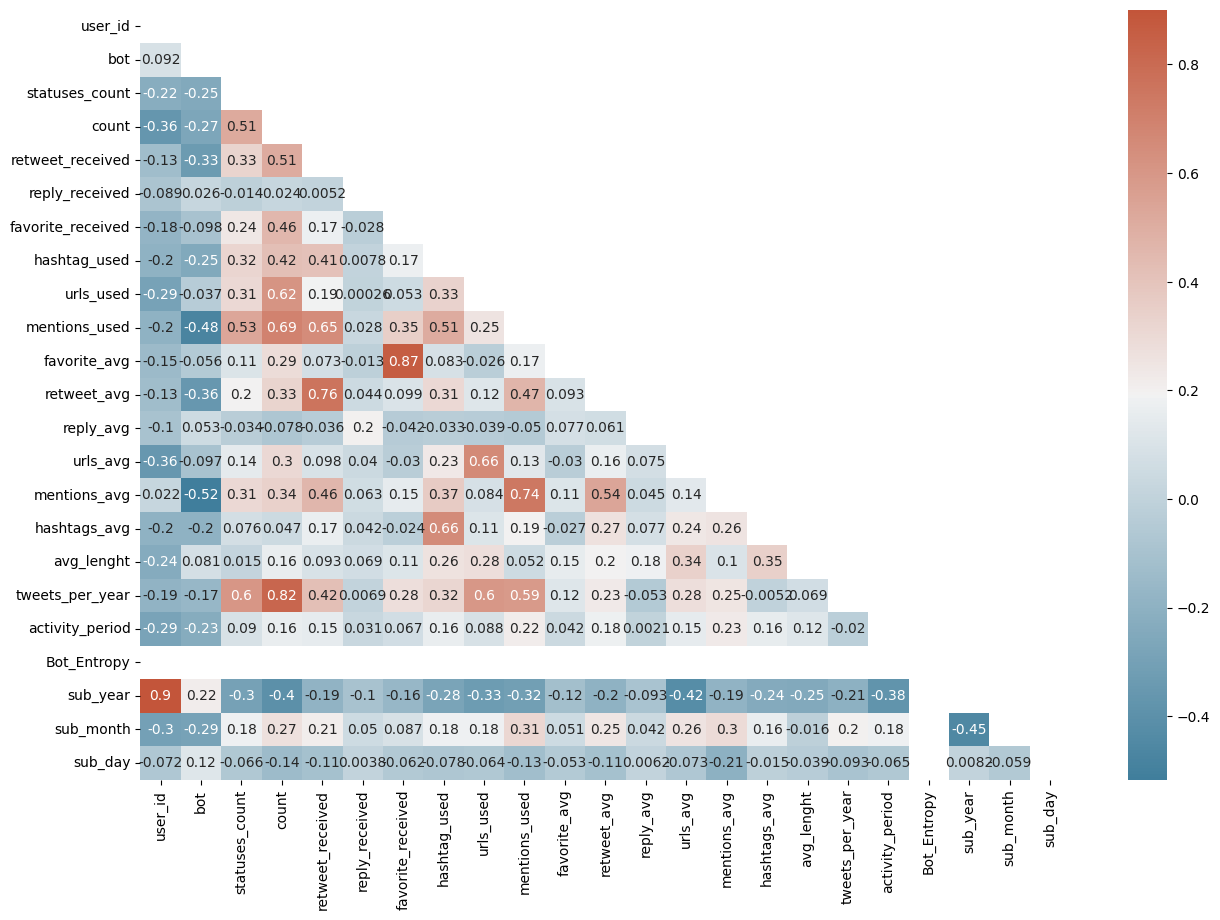

In [66]:
plt.figure(figsize=(15,10))

a = users.corr()
mask = np.triu(np.ones_like(a, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(a, annot=True, mask = mask, cmap=cmap)

plt.show()

In [62]:
# plt.figure(figsize=(15,10))

# a = tweets.corr()
# mask = np.triu(np.ones_like(a, dtype=bool))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(a, annot=True, mask = mask, cmap=cmap)

# plt.show()

# Kmeans

### Find best k with elbow method

In [152]:
print(users_clean.head())

               name  lang  bot  statuses_count  count  retweet_received  \
0   Lamonica Raborn     0    1             132    132                 5   
1     Lourie Botton     0    0             122    122                 3   
2  Dadan Syarifudin     0    1               4      4                 0   
3    Carletto Focia     1    1            1439   1439              1190   
4         MBK Ebook     0    0            7085   3656                62   

   reply_received  favorite_received  hashtag_used  urls_used  ...  reply_avg  \
0               0                  5            13          0  ...        0.0   
1               0                  6             4          0  ...        0.0   
2               0                  0             0          0  ...        0.0   
3               0                259           107         36  ...        0.0   
4               0                226           479          3  ...        0.0   

   urls_avg  mentions_avg  hashtags_avg  avg_lenght  tweets_pe

In [243]:
scaler = MinMaxScaler()
#X = users_clean.filter(items=['reply_received', 'favorite_received', 'retweet_received', 'count', 'tweets_per_year', 'activity_period'])
X = users_clean.filter(items=['reply_avg', 'favorite_avg', 'retweet_avg', 'count', 'tweets_per_year', 'activity_period'])
#X = users_clean.drop(columns=['bot', 'lang', 'name', 'statuses_count', 'sub_month', 'sub_day','sub_year'])
#X = users_clean.drop(columns=['favorite_received', 'retweet_received', 'reply_received', 'urls_used', 'mentions_used', 'hashtag_used','sub_day', 'sub_month','statuses_count'])
X_scaler = scaler.fit_transform(X)
X.head(1)

,reply_avg,favorite_avg,retweet_avg,count,tweets_per_year,activity_period
0,0.0,0.04,0.04,132,22.0,5


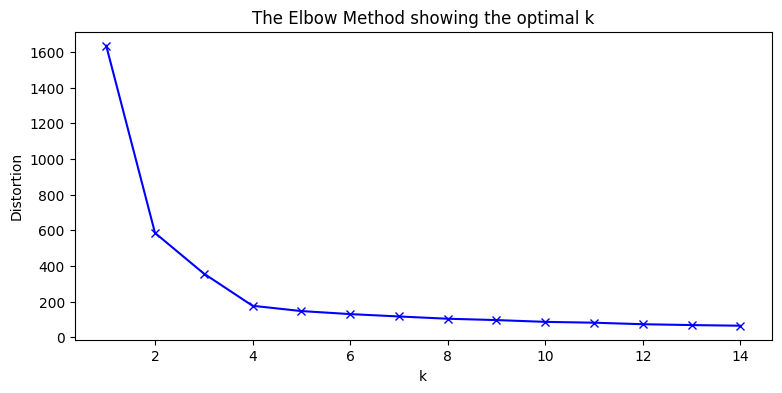

In [245]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaler)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(9,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [246]:
kmeanModel = KMeans(n_clusters=4, n_init=10, max_iter=100)
kmeanModel.fit_transform(X_scaler)

array([[0.02633114, 0.93300959, 1.15114634, 0.45404835],
       [0.0261105 , 0.93555247, 1.15250147, 0.45648471],
       [0.05485828, 0.96584749, 1.18595827, 0.48971025],
       ...,
       [0.08742641, 0.97085108, 1.08254972, 0.48479533],
       [0.02999664, 0.93953993, 1.15807629, 0.46079824],
       [0.94511134, 0.05966642, 1.03840965, 0.5104684 ]])

In [247]:
centers = kmeanModel.cluster_centers_
centers = scaler.fit_transform(centers)

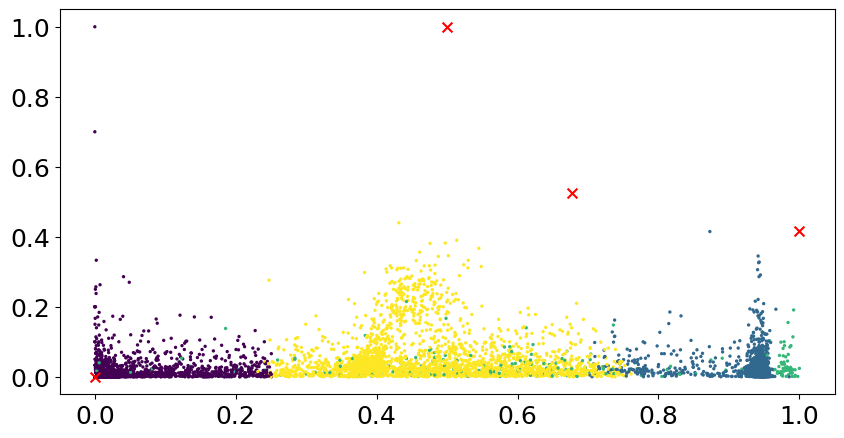

In [248]:
plt.figure(figsize = (10,5))
#plt.scatter(X_scaler[:,3], X_scaler[:,1], c=kmeanModel.labels_, s=2)
#plt.scatter(centers[:,3], centers[:,1],  c='red', marker='x', s=50)
plt.scatter(X_scaler[:,3], X_scaler[:,1], c=kmeanModel.labels_, s=2)
plt.scatter(centers[:,3], centers[:,1],  c='red', marker='x', s=50)
plt.tick_params(labelsize=18)
plt.show()

# Hierarchical clustering

In [ ]:
data_dist = pdist(X_scaler, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=10, truncate_mode='lastp')

In [ ]:
data_dist = pdist(X_scaler, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=10, truncate_mode='lastp')

In [ ]:
data_dist = pdist(X_scaler, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.75, truncate_mode='lastp')

In [ ]:
data_dist = pdist(X_scaler, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')

In [ ]:
#with sciki-learn you have to select the number of clusters you want
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_scaler)


In [ ]:
plt.scatter(X_scaler[:,0], X_scaler[:,1], c=cluster.labels_)

In [ ]:
plt.figure(figsize=(15,10))
data_dist = pdist(X_scaler, metric='euclidean')
data_link = linkage(data_dist, method='ward')

res = dendrogram(data_link, truncate_mode='lastp')

# Density clustering

In [ ]:
dbscan = DBSCAN(eps=0.15, min_samples=3)
dbscan.fit(X_scaler)

In [ ]:
dbscan.labels_[:5]

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

In [ ]:
plt.scatter(users_clean['count'], users_clean['favorite_received'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [ ]:
print('Silhouette %s' % silhouette_score(X_scaler, dbscan.labels_))